In [2]:
from matplotlib import pyplot as plt
import pandas as pd
import scipy.stats as stats

In [3]:
#read xcel data sheets
dfK9 = pd.read_excel('onerowperGene_no_distfilt.xlsx',sheet_name='H3K9ac')

dfK9

,peak,chr,chromStart,chromEnd,Name,Start_b,End_b,gene,Strand,Distance,...,CV_mean,CV_pvalue,CV_qvalue,CV_fdr_BH,GF_amplitude,GF_phase,GF_mean,GF_pvalue,GF_qvalue,GF_fdr_BH
0,chr1_4536689_4539694,chr1,4536689,4539694,1,4496413,4498413,Sox17,-,38277,...,39.825301,0.418774,0.014558,0.440632,25.201371,1.169374,113.564230,0.080235,0.003035,0.272138
1,chr1_4783493_4786944,chr1,4783493,4786944,4,4785726,4787726,Mrpl15,-,0,...,109.151862,0.029306,0.001521,0.046045,74.257269,0.933138,355.239153,0.035213,0.003000,0.269018
2,chr1_4806713_4811238,chr1,4806713,4811238,6,4805893,4807893,Lypla1,+,0,...,205.718645,0.004738,0.000583,0.017650,88.160555,20.394261,565.183389,0.188224,0.003424,0.307075
3,chr1_4855961_4859931,chr1,4855961,4859931,7,4855694,4857694,Tcea1,+,0,...,129.027240,0.018230,0.001120,0.033909,85.351211,0.465709,388.566761,0.073235,0.003031,0.271816
4,chr1_5082507_5084687,chr1,5082507,5084687,8,5081173,5083173,Atp6v1h,+,0,...,86.824283,0.007804,0.000715,0.021643,59.936170,2.121451,272.175974,0.285309,0.004010,0.359593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11987,chrY_4036396_4036859,chrY,4036396,4036859,17786,2828680,2830680,Rbmy1a1,+,1205717,...,143.287631,0.014141,0.000962,0.029122,7.582284,11.021167,35.021260,0.005017,0.002716,0.243599
11988,chrY_11857725_11858613,chrY,11857725,11858613,17794,12379989,12381989,LOC100041550,+,521377,...,142.225784,0.035456,0.001748,0.052896,18.373892,9.651637,42.688245,0.293947,0.004067,0.364696
11989,chrY_13126266_13126471,chrY,13126266,13126471,17795,13250391,13252391,LOC100040223,+,123921,...,13.356049,0.073110,0.003105,0.093973,7.238845,5.451238,17.575721,0.893170,0.009974,0.894427
11990,chrY_58852068_58855244,chrY,58852068,58855244,17796,55211720,55213720,Sly,+,3638349,...,51.010977,0.000085,0.000109,0.003294,13.239384,15.032097,97.947798,0.867062,0.009773,0.876460


In [4]:
uniq_hdac3 = pd.read_csv('../depGeneID_2_6_0.2_no_abs_FINAL/hdac3_uniq_ID.txt')['CycID'].tolist()
uniq_nfil3 = pd.read_csv('../depGeneID_2_6_0.2_no_abs_FINAL/nfil3_uniq_ID.txt')['CycID'].tolist()
uniq_nr1d1 = pd.read_csv('../depGeneID_2_6_0.2_no_abs_FINAL/nr1d1_uniq_ID.txt')['CycID'].tolist()

In [5]:
#add relative amplitude values
dfK9['CV_rAMP'] = dfK9['CV_amplitude'] / dfK9['CV_mean']
dfK9['GF_rAMP'] = dfK9['GF_amplitude'] / dfK9['GF_mean']


#get relative amplitude fold change and difference between GF and CV

dfK9['rAMP_fold_diff'] = dfK9['CV_rAMP'] / dfK9['GF_rAMP']
dfK9['rAMP_diff'] = dfK9['CV_rAMP'] - dfK9['GF_rAMP']

dfK9

,peak,chr,chromStart,chromEnd,Name,Start_b,End_b,gene,Strand,Distance,...,GF_amplitude,GF_phase,GF_mean,GF_pvalue,GF_qvalue,GF_fdr_BH,CV_rAMP,GF_rAMP,rAMP_fold_diff,rAMP_diff
0,chr1_4536689_4539694,chr1,4536689,4539694,1,4496413,4498413,Sox17,-,38277,...,25.201371,1.169374,113.564230,0.080235,0.003035,0.272138,0.123885,0.221913,0.558261,-0.098028
1,chr1_4783493_4786944,chr1,4783493,4786944,4,4785726,4787726,Mrpl15,-,0,...,74.257269,0.933138,355.239153,0.035213,0.003000,0.269018,0.481947,0.209035,2.305585,0.272913
2,chr1_4806713_4811238,chr1,4806713,4811238,6,4805893,4807893,Lypla1,+,0,...,88.160555,20.394261,565.183389,0.188224,0.003424,0.307075,0.528682,0.155986,3.389294,0.372696
3,chr1_4855961_4859931,chr1,4855961,4859931,7,4855694,4857694,Tcea1,+,0,...,85.351211,0.465709,388.566761,0.073235,0.003031,0.271816,0.485485,0.219656,2.210202,0.265829
4,chr1_5082507_5084687,chr1,5082507,5084687,8,5081173,5083173,Atp6v1h,+,0,...,59.936170,2.121451,272.175974,0.285309,0.004010,0.359593,0.548986,0.220211,2.492998,0.328775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11987,chrY_4036396_4036859,chrY,4036396,4036859,17786,2828680,2830680,Rbmy1a1,+,1205717,...,7.582284,11.021167,35.021260,0.005017,0.002716,0.243599,0.258778,0.216505,1.195250,0.042273
11988,chrY_11857725_11858613,chrY,11857725,11858613,17794,12379989,12381989,LOC100041550,+,521377,...,18.373892,9.651637,42.688245,0.293947,0.004067,0.364696,0.366811,0.430420,0.852216,-0.063609
11989,chrY_13126266_13126471,chrY,13126266,13126471,17795,13250391,13252391,LOC100040223,+,123921,...,7.238845,5.451238,17.575721,0.893170,0.009974,0.894427,0.940940,0.411866,2.284578,0.529074
11990,chrY_58852068_58855244,chrY,58852068,58855244,17796,55211720,55213720,Sly,+,3638349,...,13.239384,15.032097,97.947798,0.867062,0.009773,0.876460,0.456215,0.135168,3.375176,0.321047


In [6]:
num_hdac3 = len(uniq_hdac3)
num_nfil3 = len(uniq_nfil3)
num_nr1d1 = len(uniq_nr1d1)
print(num_hdac3, num_nfil3, num_nr1d1)

600 373 800


In [7]:
dfk9signals = set(dfK9['gene'].tolist())
hdac3chip = set(uniq_hdac3) & dfk9signals
nfil3chip = set(uniq_nfil3) & dfk9signals
nr1d1chip = set(uniq_nr1d1) & dfk9signals
print(len(hdac3chip), len(nfil3chip), len(nr1d1chip))

460 285 618


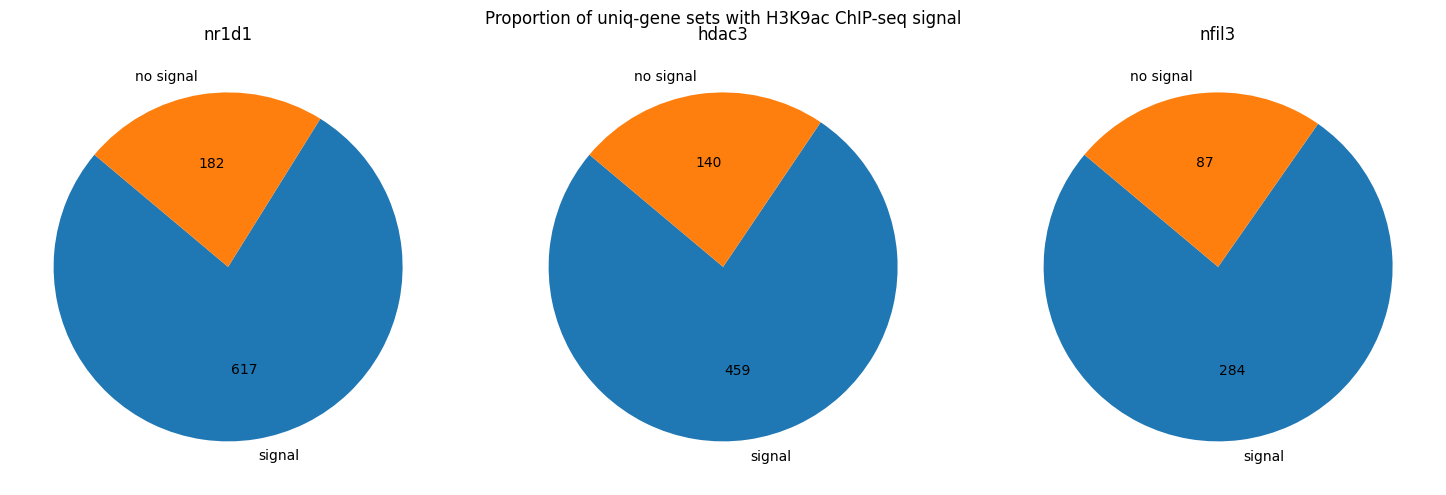

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
data = {
    'Category': ['signal', 'no signal'],
    'nr1d1': [len(nr1d1chip), num_nr1d1 - len(nr1d1chip)],
    'hdac3': [len(hdac3chip), num_hdac3 - len(hdac3chip)],
    'nfil3': [len(nfil3chip), num_nfil3 - len(nfil3chip)],
}

df = pd.DataFrame(data).set_index('Category')

# Create subplot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Titles for each pie chart
titles = ['nr1d1', 'hdac3', 'nfil3']

# Generate each pie chart
for i, column in enumerate(df.columns):
    axes[i].pie(
        df[column], 
        labels=df.index, 
        autopct=lambda p: f'{int(p * sum(df[column]) / 100)}',  # Show count instead of percentage
        startangle=140
    )
    axes[i].set_title(titles[i])

# Adjust layout and show plot
fig.suptitle('Proportion of uniq-gene sets with H3K9ac ChIP-seq signal')
plt.tight_layout()
plt.show()

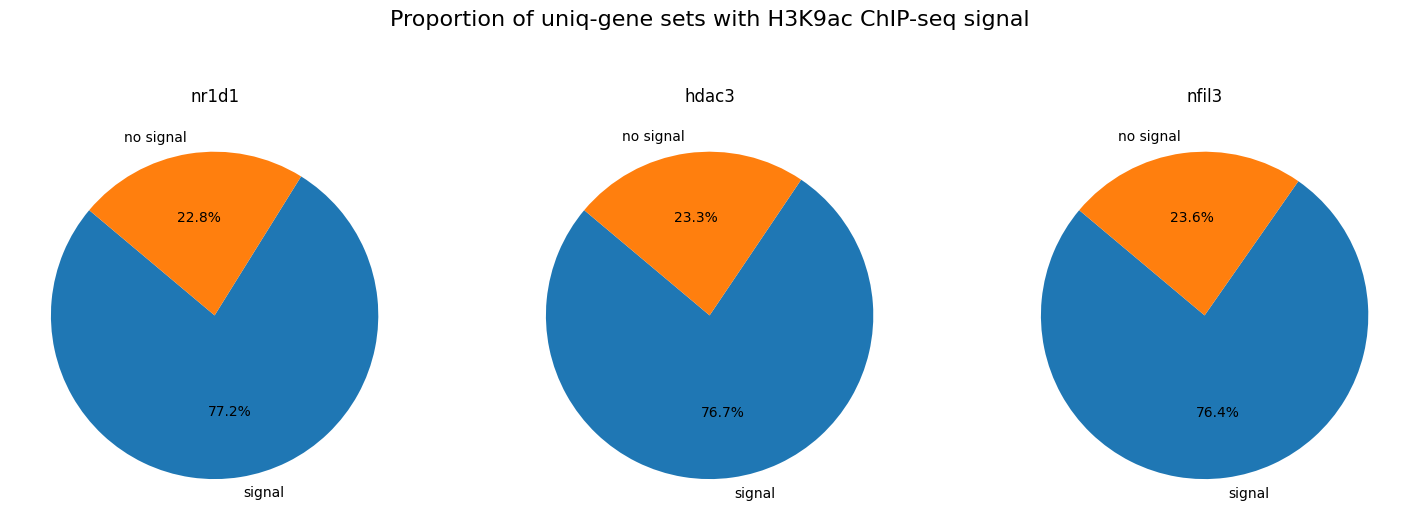

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
data = {
    'Category': ['signal', 'no signal'],
    'nr1d1': [len(nr1d1chip), num_nr1d1 - len(nr1d1chip)],
    'hdac3': [len(hdac3chip), num_hdac3 - len(hdac3chip)],
    'nfil3': [len(nfil3chip), num_nfil3 - len(nfil3chip)],
}

df = pd.DataFrame(data).set_index('Category')

# Create subplot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # Widen figure for better layout

# Titles for each pie chart
titles = ['nr1d1', 'hdac3', 'nfil3']

# Generate each pie chart
for i, column in enumerate(df.columns):
    axes[i].pie(df[column], labels=df.index, autopct='%1.1f%%', startangle=140)
    axes[i].set_title(titles[i])

# Adjust the position of the main title
fig.suptitle('Proportion of uniq-gene sets with H3K9ac ChIP-seq signal', y=1.05, fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout so subplots and suptitle fit better
plt.show()